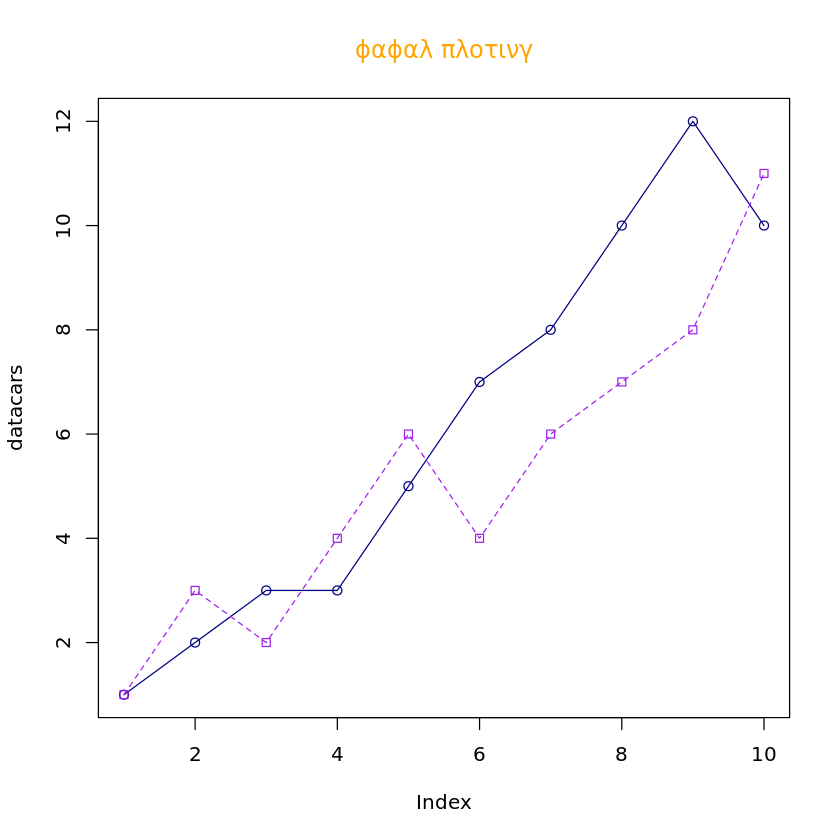

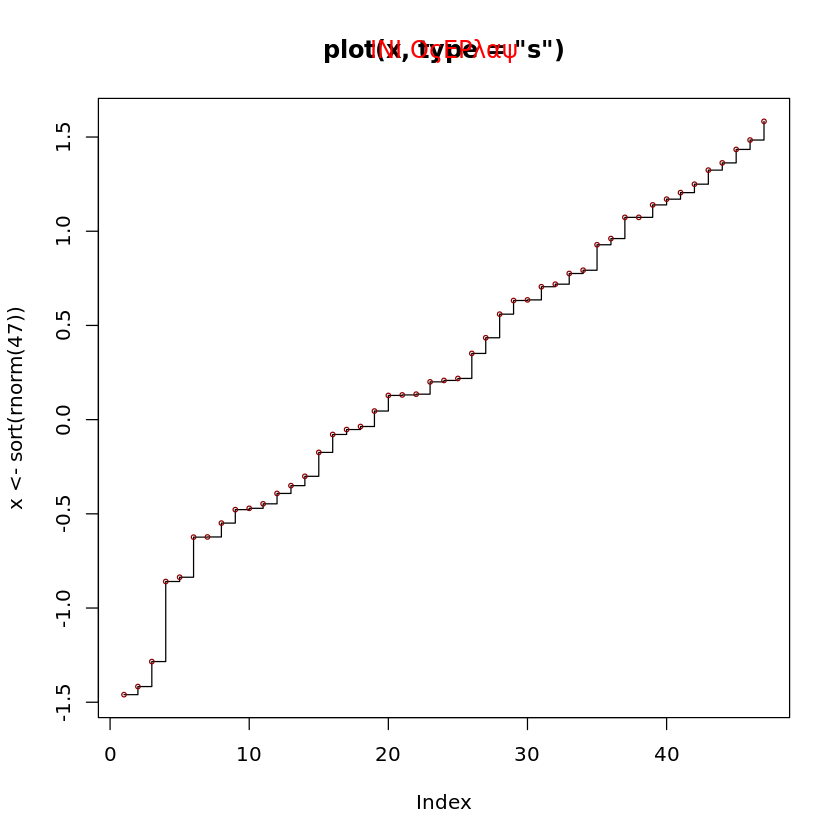

In [220]:
# Training Pemrograman R - Sesi 6: Basic plotting and visualization
library(tidyverse)

# ?plot
# SOAL: tampillkan perbedaan nilai dua objek dalam satu display
datacars <- c(1,2,3,3,5,7,8,10,12,10)
datatrucks <- c(1,3,2,4,6,4,6,7,8,11)
plot(
    datacars,
    t="o",
    col="navy",
    ylim=c(
        min(c(datacars,datatrucks)),
        max(c(datacars,datatrucks))),
    xlim=c(
        1,
        length(datacars))) %>% 
title(
    main = "jajal ploting",
    col.main="orange",
    font.main=5
)
# Fit a line robustly as recommended in Exploratory Data Analysis.
# Currently by default (iter = 1) the initial median-median line 
# is not iterated (as opposed to Tukey's “resistant line” in the references). 
# ?line #cek saya dengan uncomment disini
# by integral/kalkulus. line() use to find batas atas dan batas bawah koefisien suatu fungsi

# sedangkan lines untuk modifikasi tampilan dari plot
lines(datatrucks,col = "purple", lty=2, pch=22, t="o")
# untuk fingsi2 spt ini, akan diimplementasikan 
# tergantung pada dimana kamu menggambarnya

plot(x <- sort(rnorm(47)), type = "s", main = "plot(x, type = \"s\")")
title(main = "INI OVERlay",col.main="RED",font.main=5)

points(x, cex = .5, col = "dark red")

[1] 5

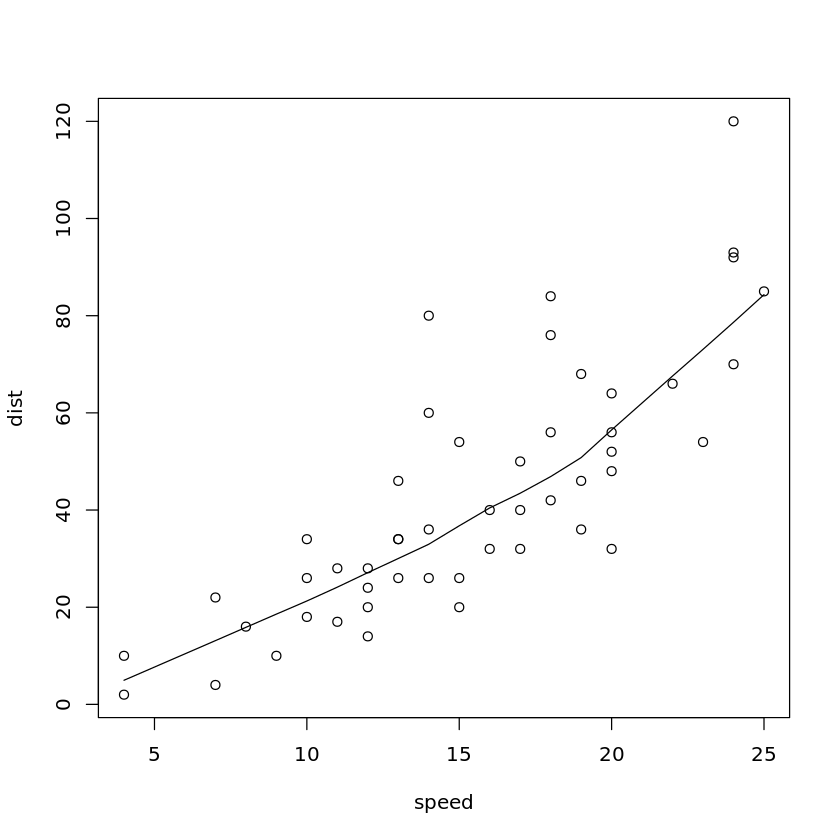

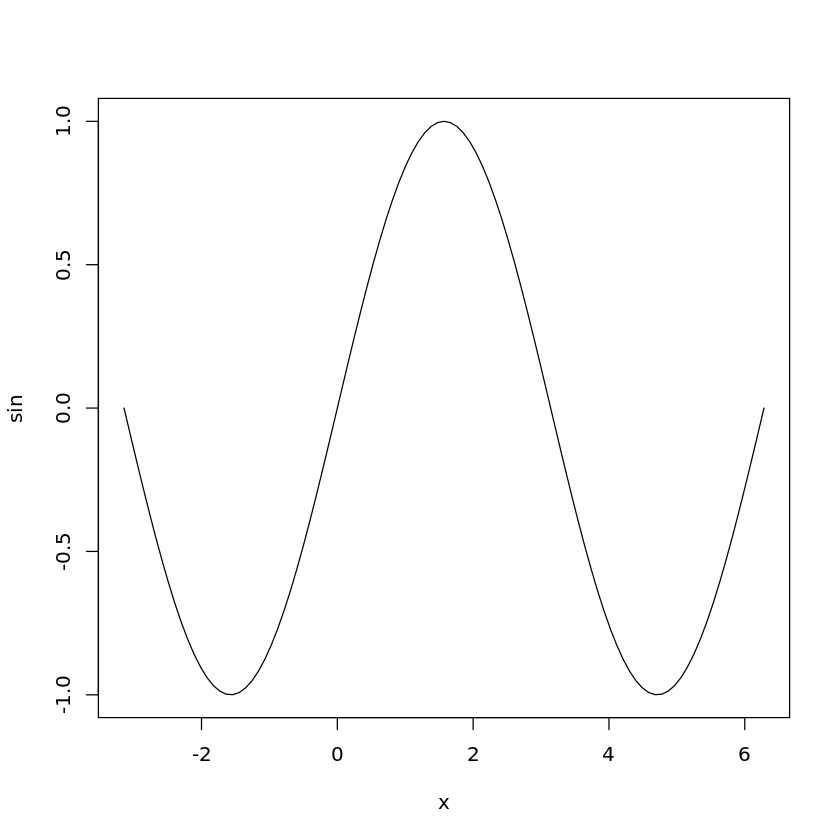

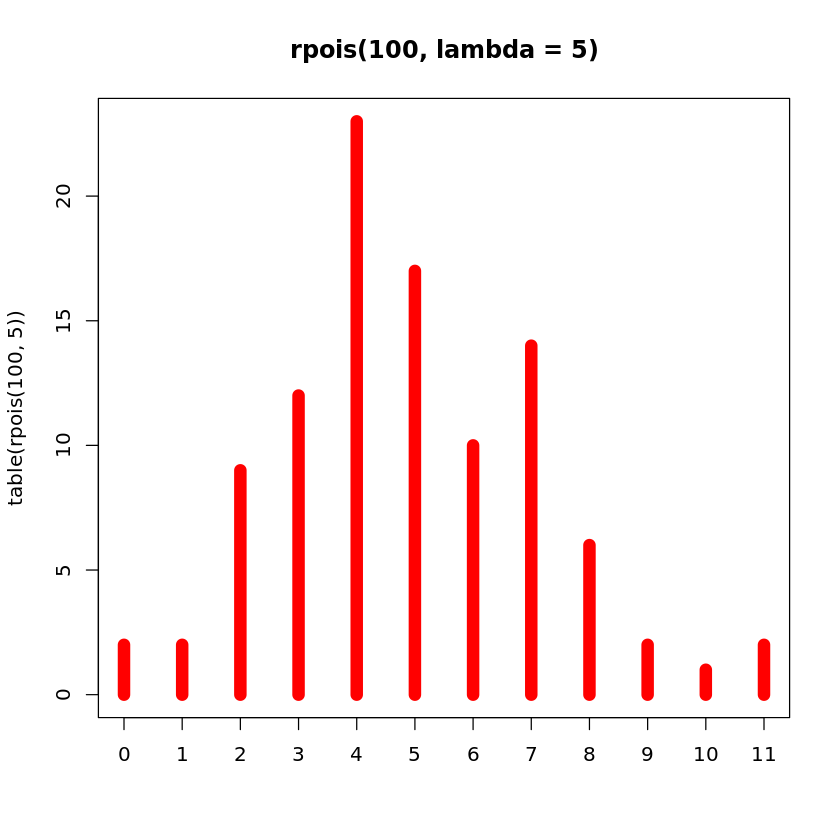

In [62]:
require(stats) # for lowess, rpois, rnorm
plot(cars)
lines(lowess(cars))

plot(sin, -pi, 2*pi) # see ?plot.function
## Discrete Distribution Plot:
plot(
    table(rpois(100, 5)),
    type = "h",
    col = "red",
    lwd = 10,
    main = "rpois(100, lambda = 5)"
)

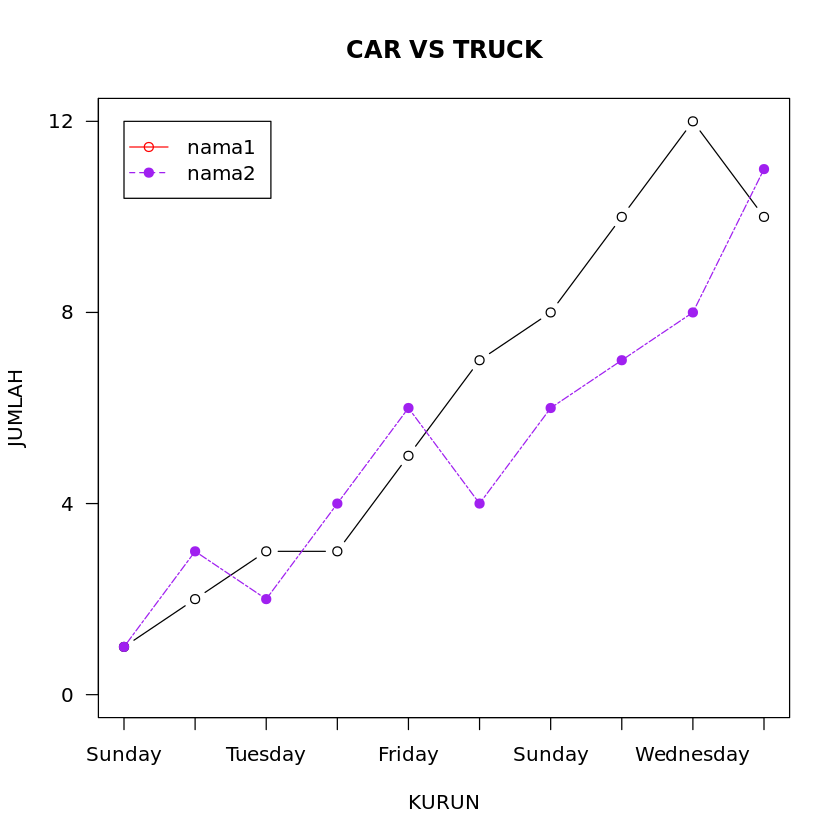

In [345]:
library(lubridate)
displayP1 <- function(){
    # length(datacars,datatrucks)
    # length(datatrucks %in% datacars)
    # length(setdiff(datacars,datatrucks))
    # length(intersect(datatrucks,datacars))
    g_range <- range(0,datacars,datatrucks)
    lm_both <- max(c(length(datacars),length(datatrucks)))
    d_list <- weekdays(
        dmy(
            paste0(
                '2204',
                as.character(
                    2001:paste0(
                        20,
                        lm_both
                    )
                )
            )
        )
    )
    plot(datacars,t="b",ylim = g_range, axes = F,ann = F)
    opt_axis <- function(){
        #Adds an axis to the current plot, allowing the specification of the side, position, labels, and other options.
        #1st axis for X
        axis(
            1, #1st axis for X
            at = 1:lm_both,
        # glimpse(weekdays(dmy(paste0('2204',2001:2005))))
        # glimpse(c("mon","thu","thu","thu","thu"))
            lab = d_list
        )
        axis(2, #2nd axis for Y
             las=1,
             at=4*0:g_range[2]
            )

    }
    box() #jika anda menginginkan kotak
    opt_axis()
    lines(
        datatrucks,
        t="o",
        col="purple",
        pch=19, #option point model: many
        lty=6 #option line model: titik,garis,dot,etc
    )
    title(main = "CAR VS TRUCK",xlab = "KURUN",ylab = "JUMLAH")
    #beri legend
    legend(1,g_range[2],c("nama1","nama2"),pch = c(1,19),lty = 1:2,col = c("red","purple"))
}
displayP1()

In [322]:
library(tidyverse)
g_range
range(0,datacars,datatrucks)
max(
        c(
            length(datacars),
            length(datatrucks)
        )
    )
glimpse(seq(1,3))
glimpse(1:5)
4*0:10
lm_both

[1]  0 12

[1]  0 12

[1] 10

 int [1:3] 1 2 3
 int [1:5] 1 2 3 4 5


[1]  0  4  8 12 16 20 24 28 32 36 40

[1] 10

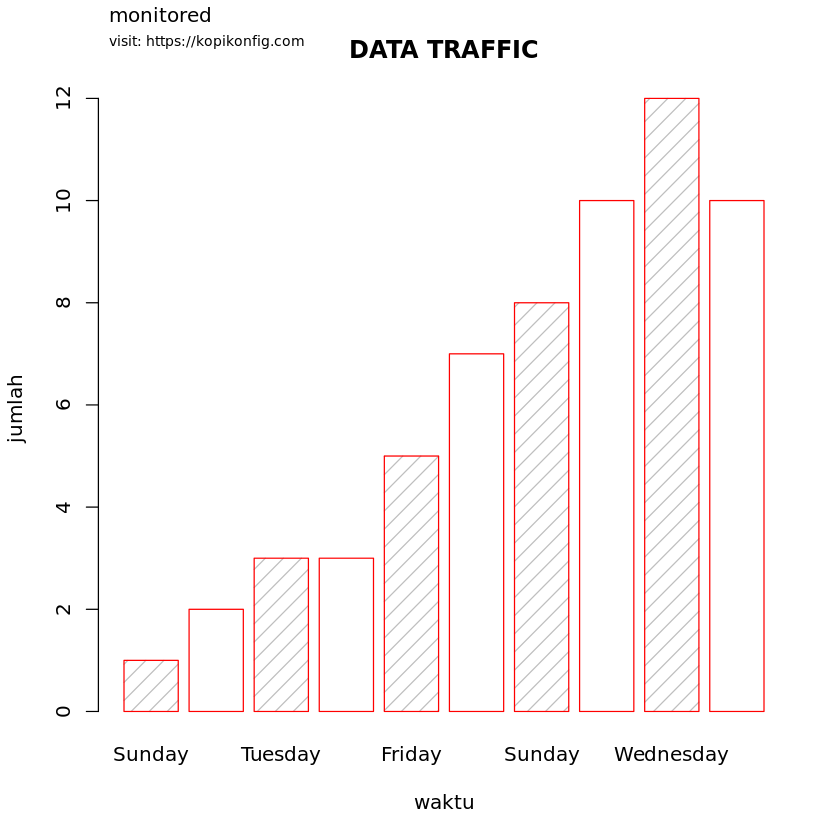

In [362]:
displayP2 <- function(){
    barplot(
        datacars,
        main = "DATA TRAFFIC",
        ylab = "jumlah",
        xlab = "waktu",
        border = "red",
        names.arg=d_list,
        density=c(10,0)
    )
    mtext(side=3, line=3, at=-0.07, adj=0, cex=1, "monitored")
    mtext(side=3, line=2, at=-0.07, adj=0, cex=0.7, "visit: https://kopikonfig.com")
}
displayP2()

In [ ]:
displayP3 <- function(){
    #coba binding 2 data ditampilkan dalam 1 display
    
}